In [737]:
import numpy as np
import pandas as pd

### Load the train and test dataset using Pandas

In [738]:
train = pd.read_csv('C:/Users/HP/Desktop/Titanic Kaggle/train.csv')
test = pd.read_csv('C:/Users/HP/Desktop/Titanic Kaggle/test.csv')

### Exploratory Data Analysis

**Printing the first 5 rows of the train dataset**

In [739]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [740]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Clarification about some columns

- **Survived: 1 = Yes; 0 = No**
- **Pclass: Passenger Travel Class; 1st,2nd,3rd**
- **Sibsp: # of Sibling or Spouse boarded into titanic**
- **Parch: # of parents or children boarded into titanic**
- **Cabin: cabin number**
- **Embarked: Port of the embarkation C = Cherbourg, Q = Queenstown, S = Southampton** 

### Dataset Details

In [741]:
train.shape

(891, 12)

In [742]:
test.shape

(418, 11)

In [743]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [744]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Calculating the Missing Values

In [745]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [746]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Plot The Missing Values

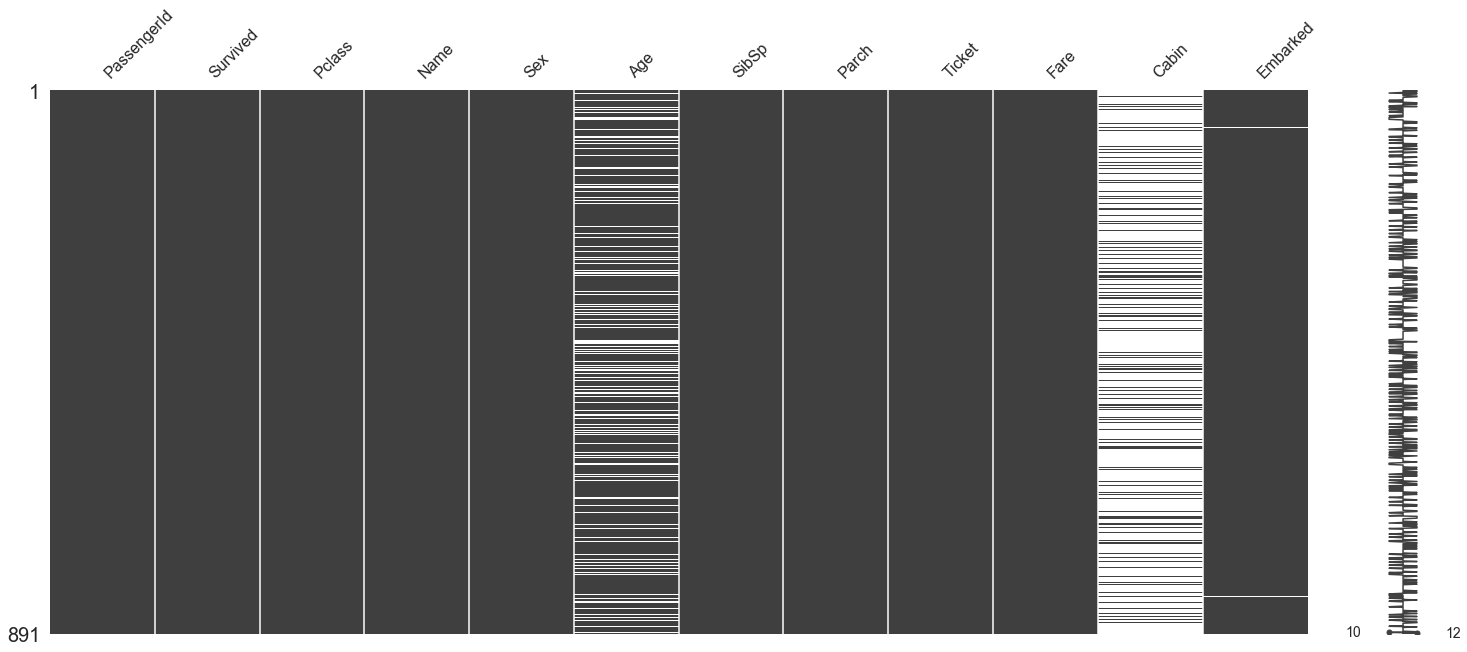

In [747]:
import missingno as mn
mn.matrix(train)

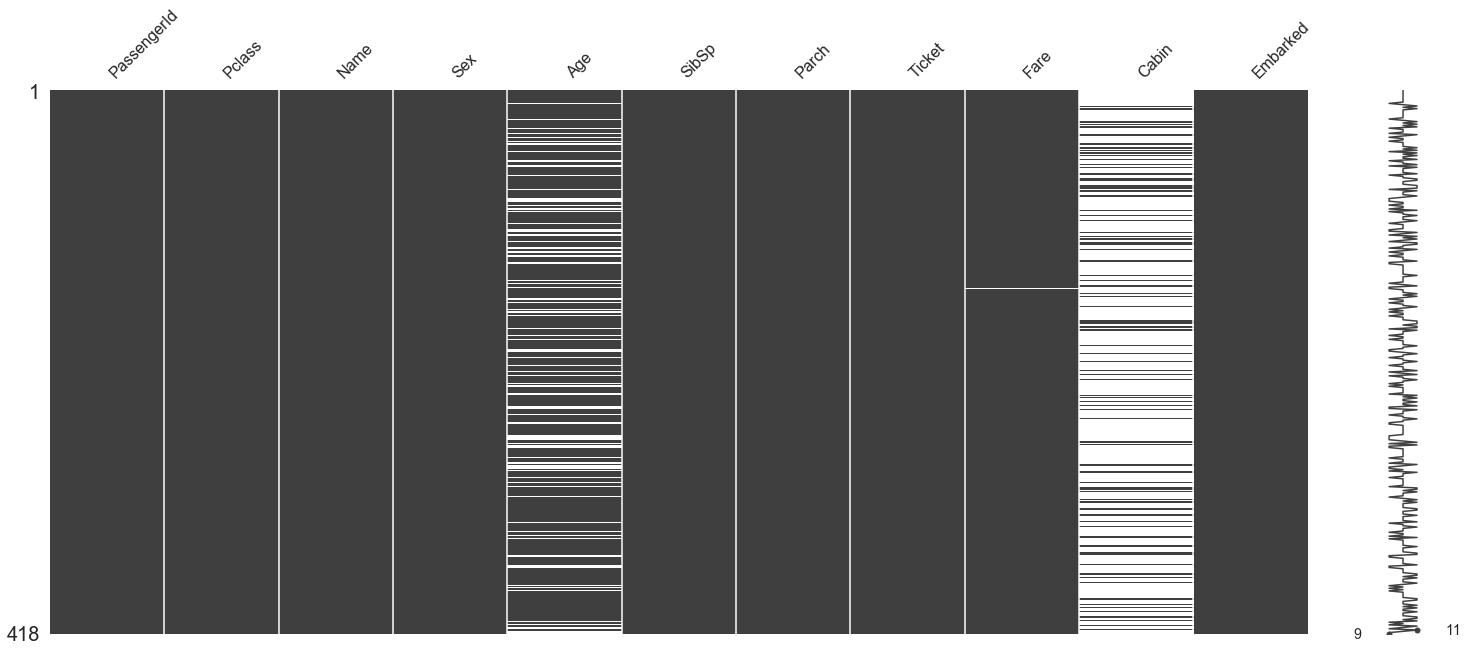

In [748]:
mn.matrix(test)

## Data Visualization

In [749]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()   # setting seaborn default for set

### Bar Chart for Categorical Features
- **Pclass**
- **Sex**
- **SibSp**
- **Parch**
- **Cabin**
- **Embarked**

In [750]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

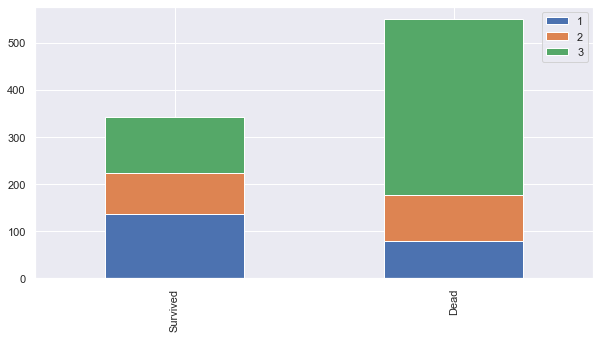

In [751]:
bar_chart('Pclass')

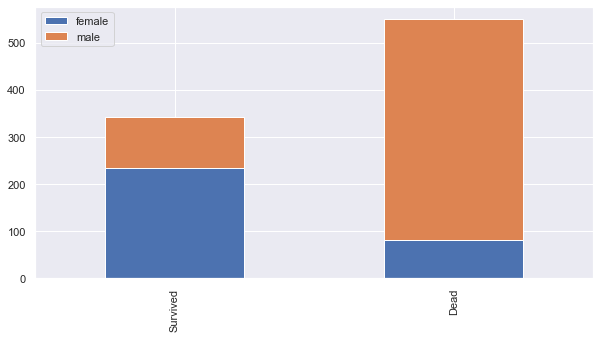

In [752]:
bar_chart('Sex')

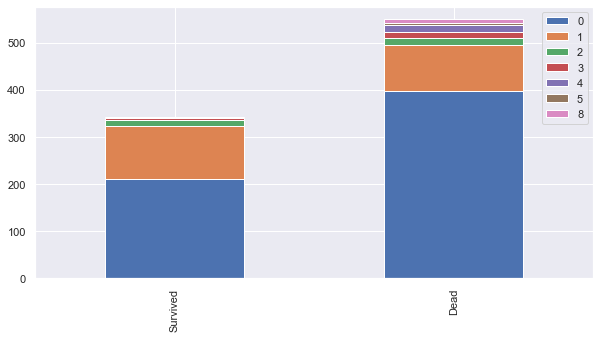

In [753]:
bar_chart('SibSp')

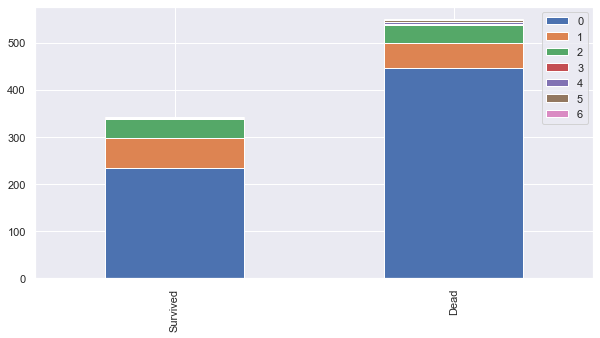

In [754]:
bar_chart('Parch')

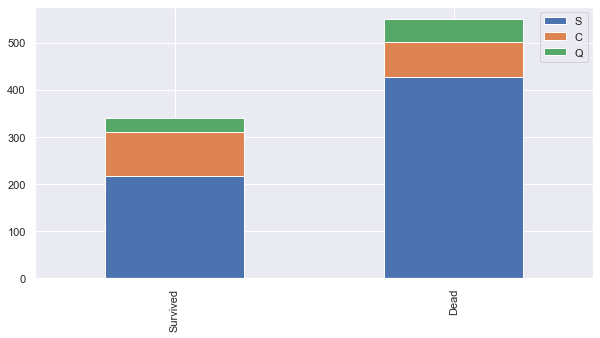

In [755]:
bar_chart('Embarked')

## Feature Engineering

In [756]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [757]:
train.set_index(['PassengerId'], inplace = True)
# test.set_index(['PassengerId'], inplace = True)

In [758]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [759]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Dropping Unnecessary Features

In [760]:
train.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
# train.head()
test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
# test.head()

In [761]:
train.shape

(891, 8)

In [762]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Dealing with Missing Values

- **Here we will use sklearn.preprocessing.Imputer**

In [763]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='median',axis=1)
Age2=imp.fit_transform(train.Age.values.reshape(1,-1))
Age2 = Age2.T
train['Age2'] = Age2
# train.head()
Age_test = imp.fit_transform(test.Age.values.reshape(1,-1))
Age_test = Age_test.T
test['Age_test'] = Age_test
# test.head()
Fare_test = imp.fit_transform(test.Fare.values.reshape(1,-1))
Fare_test = Fare_test.T
test['Fare_test'] = Fare_test


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Transforming Age and Fare of Training Set

In [764]:
#Mapping the data.
train['Fare'] = train['Fare'].astype(int)
train.loc[train.Fare<=7.91,'Fare']=0
train.loc[(train.Fare>7.91) &(train.Fare<=14.454),'Fare']=1
train.loc[(train.Fare>14.454)&(train.Fare<=31),'Fare']=2
train.loc[(train.Fare>31),'Fare']=3

train['Age2']=train['Age2'].astype(int)
train.loc[ train['Age2'] <= 16, 'Age2']= 0
train.loc[(train['Age2'] > 16) & (train['Age2'] <= 32), 'Age2'] = 1
train.loc[(train['Age2'] > 32) & (train['Age2'] <= 48), 'Age2'] = 2
train.loc[(train['Age2'] > 48) & (train['Age2'] <= 64), 'Age2'] = 3
train.loc[train['Age2'] > 64, 'Age2'] = 4



### Transforming Age and Fare of Test set

In [765]:
test['Fare_test'] = test['Fare_test'].astype(int)
test.loc[test.Fare_test<=7.91,'Fare_test']=0
test.loc[(test.Fare_test>7.91) &(test.Fare_test<=14.454),'Fare_test']=1
test.loc[(test.Fare_test>14.454)&(test.Fare_test<=31),'Fare_test']=2
test.loc[(test.Fare_test>31),'Fare_test']=3

test['Age_test']=test['Age_test'].astype(int)
test.loc[ test['Age_test'] <= 16, 'Age_test']= 0
test.loc[(test['Age_test'] > 16) & (test['Age_test'] <= 32), 'Age_test'] = 1
test.loc[(test['Age_test'] > 32) & (test['Age_test'] <= 48), 'Age_test'] = 2
test.loc[(test['Age_test'] > 48) & (test['Age_test'] <= 64), 'Age_test'] = 3
test.loc[test['Age_test'] > 64, 'Age_test'] = 4

In [766]:
train.drop('Age', axis = 1, inplace = True)

test.drop(['Age','Fare'],axis=1,inplace=True)

In [767]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age_test,Fare_test
0,892,3,male,0,0,Q,2,0
1,893,3,female,1,0,S,2,0
2,894,2,male,0,0,Q,3,1
3,895,3,male,0,0,S,1,1
4,896,3,female,1,1,S,1,1


In [768]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Age2        0
dtype: int64

In [769]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [770]:
train.Embarked.fillna('S', inplace = True)
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Age2        0
dtype: int64

In [771]:
train = pd.get_dummies(train, columns=["Sex"], drop_first=True)
train = pd.get_dummies(train, columns=["Embarked"],drop_first=True)
test = pd.get_dummies(test, columns=["Sex"], drop_first=True)
test = pd.get_dummies(test, columns=["Embarked"],drop_first=True)



In [772]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,1,0,1
2,1,1,1,0,3,2,0,0,0
3,1,3,0,0,0,1,0,0,1
4,1,1,1,0,3,2,0,0,1
5,0,3,0,0,1,2,1,0,1


In [773]:
test.head()

,PassengerId,Pclass,SibSp,Parch,Age_test,Fare_test,Sex_male,Embarked_Q,Embarked_S
0,892,3,0,0,2,0,1,1,0
1,893,3,1,0,2,0,0,0,1
2,894,2,0,0,3,1,1,1,0
3,895,3,0,0,1,1,1,0,1
4,896,3,1,1,1,1,0,0,1


In [774]:
test.isnull().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Age_test       0
Fare_test      0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [775]:
# test.Fare_test.fillna(test.Fare_test.mean(), inplace = True)
# test.isnull().sum()

In [776]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null int32
Age2          891 non-null int32
Sex_male      891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: int32(2), int64(4), uint8(3)
memory usage: 44.4 KB


## Exploratory Data Analysis

In [777]:
train.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,1.453423,1.288440,0.647587,0.086420,0.725028
std,0.486592,0.836071,1.102743,0.806057,1.124206,0.812038,0.477990,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000


In [778]:
train.groupby('Survived').mean()

,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,,,,,,,,
0,2.531876,0.553734,0.329690,1.185792,1.31694,0.852459,0.085610,0.777778
1,1.950292,0.473684,0.464912,1.883041,1.24269,0.318713,0.087719,0.640351


In [779]:
train.groupby('Sex_male').mean()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Embarked_Q,Embarked_S
Sex_male,,,,,,,,
0,0.742038,2.159236,0.694268,0.649682,1.815287,1.210191,0.114650,0.652866
1,0.188908,2.389948,0.429809,0.235702,1.256499,1.331023,0.071057,0.764298


### Correlation Matrix

In [780]:
train.corr()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.035322,0.081629,0.301792,-0.044492,-0.543351,0.003650,-0.149683
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.660699,-0.358005,0.131900,0.221009,0.074053
SibSp,-0.035322,0.083081,1.000000,0.414838,0.365893,-0.218846,-0.114631,-0.026354,0.068734
Parch,0.081629,0.018443,0.414838,1.000000,0.363097,-0.134014,-0.245489,-0.081228,0.060814
Fare,0.301792,-0.660699,0.365893,0.363097,1.000000,0.113812,-0.237585,-0.227213,-0.028885
Age2,-0.044492,-0.358005,-0.218846,-0.134014,0.113812,1.000000,0.071125,-0.079779,0.023749
Sex_male,-0.543351,0.131900,-0.114631,-0.245489,-0.237585,0.071125,1.000000,-0.074115,0.119224
Embarked_Q,0.003650,0.221009,-0.026354,-0.081228,-0.227213,-0.079779,-0.074115,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,0.068734,0.060814,-0.028885,0.023749,0.119224,-0.499421,1.000000


### Heatmap

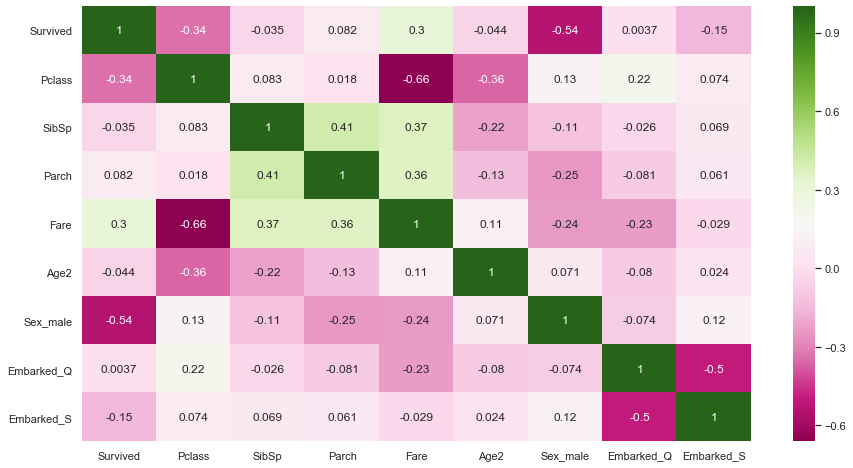

In [781]:
plt.subplots(figsize = (15,8))

sns.heatmap(train.corr(), annot = True, cmap = 'PiYG')

- **annot = True will print all the correlation values in the rectangular box**
- **Parch and SibSp are positively correlated features with correlation value 0.41**
- **Fare and Survived are positively correlated features with correlation value 0.26**
- **Fare and Pclass are negatively correlated features with correlation value -0.55**
- **Survived and Sex are negatively correlated features with correlation value -0.54**
- **Survived and Pclass are negatively correlated features with correlation value -0.34**



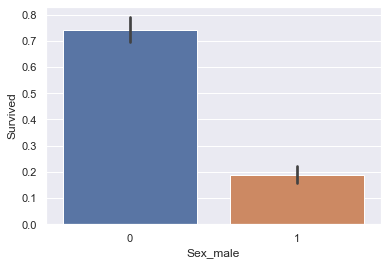

In [782]:
sns.barplot(x = 'Sex_male', y = 'Survived', data = train)

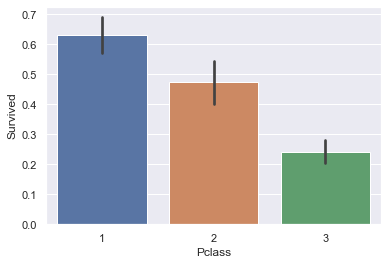

In [783]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)

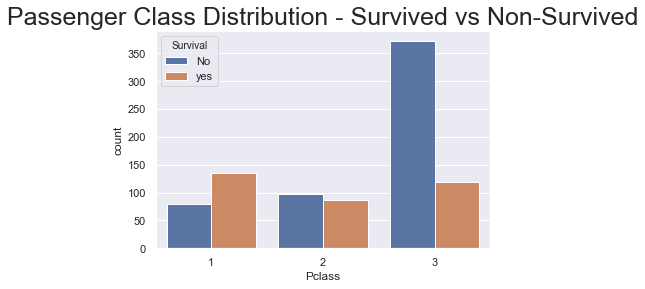

In [784]:
ax=sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

#### Pclass & Survival

([<matplotlib.axis.XTick at 0x13168b691d0>,
 <a list of 3 Text xticklabel objects>)

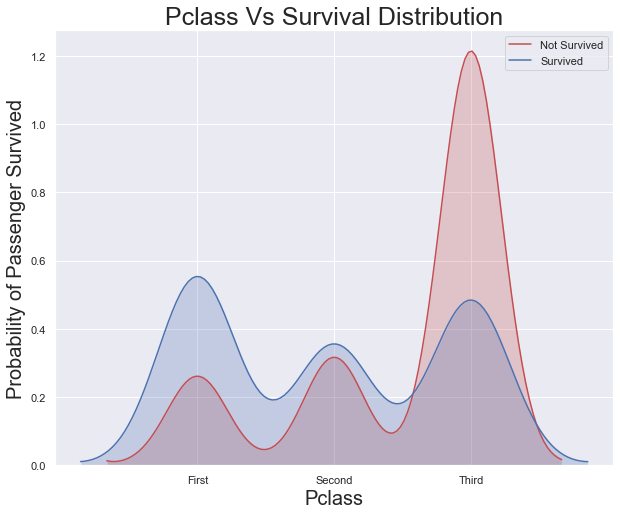

In [785]:
plt.subplots(figsize=(10,8))
sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )
plt.title('Pclass Vs Survival Distribution', fontsize =25)
plt.ylabel('Probability of Passenger Survived', fontsize=20)
plt.xlabel('Pclass', fontsize=20)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels)

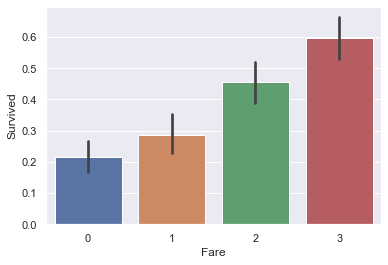

In [786]:
sns.barplot(x = 'Fare', y = 'Survived', data = train)

### Fare and Survival

Text(0.5, 0, 'Fare')

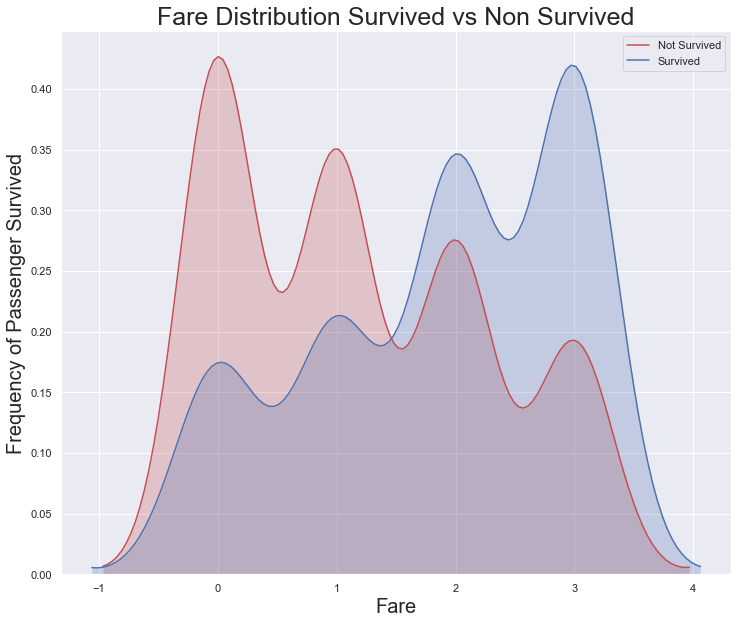

In [787]:
plt.subplots(figsize=(12,10))

ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

### Age & Survival

Text(0.5, 0, 'Age')

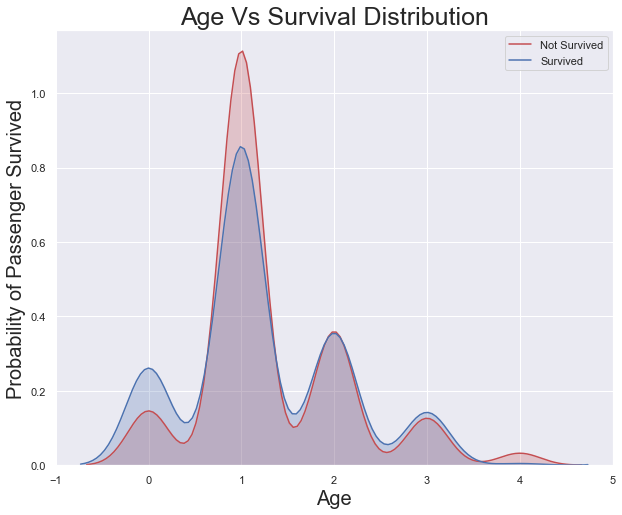

In [788]:
plt.subplots(figsize=(10,8))

sns.kdeplot(train.loc[(train['Survived']==0),'Age2'],color='r',shade=True,label='Not Survived')
sns.kdeplot(train.loc[(train['Survived']==1),'Age2'],color='b',shade=True,label='Survived')
plt.title('Age Vs Survival Distribution', fontsize =25)
plt.ylabel('Probability of Passenger Survived',fontsize=20)
plt.xlabel('Age',fontsize=20)

## Modelling

In [789]:
X=train.drop('Survived',axis=1)
y=train['Survived'].astype(int)

### Import Classifier Modules

In [790]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma = 'scale'),
    DecisionTreeClassifier(),
    XGBClassifier(),
    RandomForestClassifier(random_state = 22),
    AdaBoostClassifier(),
    GradientBoostingClassifier(random_state = 0),
    GaussianNB(),
    LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [791]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
acc_dict = {}

for train_index, test_index in sss.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'Classifier Accuracy')

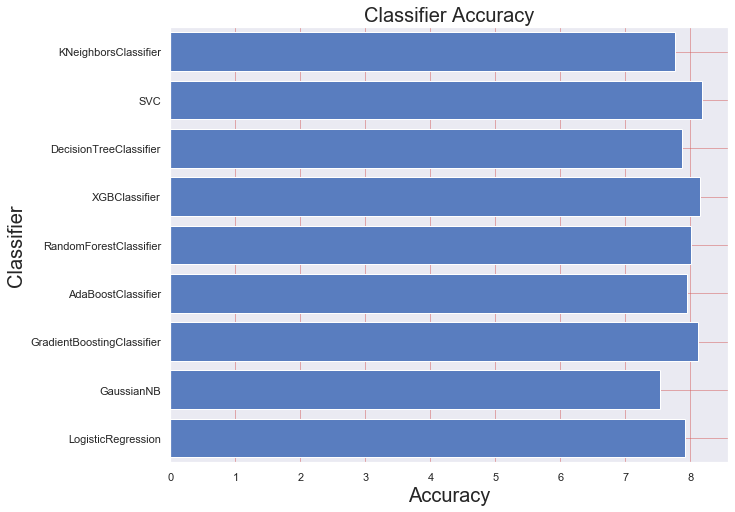

In [792]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2,3,4,5,6,7,8]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)

# Testing

In [793]:
# classifier=SVC()
# clf = GradientBoostingClassifier(random_state = 0)
clf = RandomForestClassifier(random_state = 22)
xtrain=train.iloc[:,1:]
ytrain=train.iloc[:,:1]
ytrain=ytrain.values.ravel()
clf.fit(xtrain,ytrain)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [794]:
test_data = test.drop('PassengerId', axis =1).copy()
prediction = clf.predict(test_data)

In [795]:
submission = pd.DataFrame({"PassengerId": test['PassengerId'], "Survived": prediction})
submission.to_csv('rfsubmission.csv', index = False)

In [796]:
submission = pd.read_csv('rfsubmission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [797]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,